## cloudFPGA Studio
### Case study: Harris Corner Detector (Computer Vision)
### You don't need FPGA knowledge, just basic Python syntax !!!

Note: Assuming that the FPGA is already flashed

Configure the Python path to look for FPGA aceleration library

In [1]:
import time
import sys
import os
from IPython.display import Image
from IPython.display import display

# for software execution
#from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
from matplotlib import pyplot as plt

In [2]:
trieres_lib=os.environ['cFpRootDir'] + "HOST/vision/harris/languages/python/build"
sys.path.append(trieres_lib)

Import the FPGA accelerator library

In [3]:
import _trieres

Assign the IP of the FPGA that is already loaded with MCEuropeanEngine image

In [4]:
#fpga_ip=os.environ['FPGA_IP']
fpga_ip="localhost"
print(fpga_ip)

localhost


Give an input image for processing:

In [5]:
input = os.environ['cFpRootDir'] + "ROLE/vision/hls/harris/test/512x512.png"

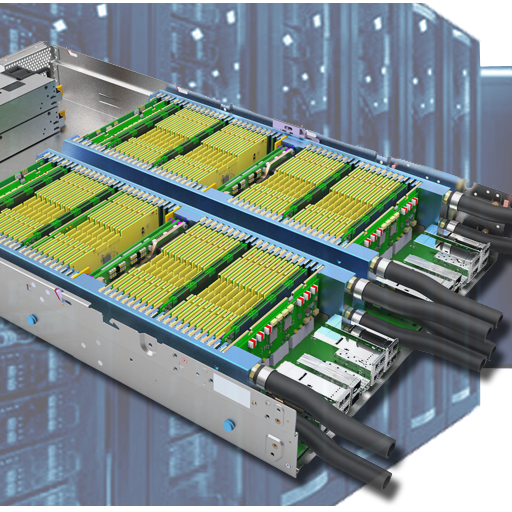

In [6]:
Image(filename = input, width = 256, height = 256)

Execute the FPGA accelerator as a Python function

In [7]:
start_fpga = time.time()

out, output_image, output_points = _trieres.harris(fpga_ip, "1234", input)

done_fpga = time.time()
elapsed_fpga = done_fpga - start_fpga

In [8]:
print("The output image file is " + output_image)

print("The output points file is " + output_points)

The output image file is /home/diaman/projects/cloudFPGA/cFp_Vitis/ROLE/vision/hls/harris/test/512x512.png_fpga_img_out_frame_1.png
The output points file is /home/diaman/projects/cloudFPGA/cFp_Vitis/ROLE/vision/hls/harris/test/512x512.png_fpga_points_out_frame_1.png


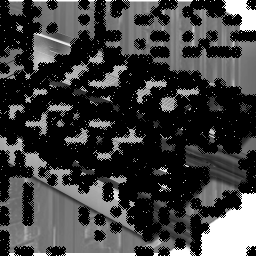

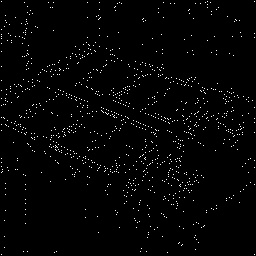

In [9]:
x = Image(filename = output_image)
y = Image(filename = output_points)
display(x,y)

Now we can start with a software-only solution to compare the quality of the outut and the elapsed time 

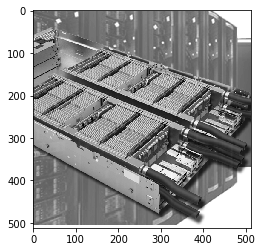

In [10]:
src = cv.imread(input)
if src is None:
    print('Could not open or find the image:', input)
    exit(0)
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
#src_gray2 = src_gray2[:,:,::-1] 
plt.imshow(src_gray, cmap="gray")
plt.show()

In [16]:
def cornerHarris_demo(val):
    thresh = val
    # Detector parameters
    blockSize = 2
    apertureSize = 3
    k = 0.04
    # Detecting corners
    start_cpu = time.time()
    dst = cv.cornerHarris(src_gray, blockSize, apertureSize, k)
    # Normalizing
    dst_norm = np.empty(dst.shape, dtype=np.float32)
    cv.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
    dst_norm_scaled = cv.convertScaleAbs(dst_norm)
    done_cpu = time.time()
    elapsed_cpu = done_cpu - start_cpu
    # Drawing a circle around corners
    circles=0
    for i in range(dst_norm.shape[0]):
        for j in range(dst_norm.shape[1]):
            if int(dst_norm[i,j]) > thresh:
                cv.circle(dst_norm_scaled, (j,i), 5, (0), 2)
                circles = circles+1
    # Showing the result
    print("Points : ", circles)
    plt.imshow(dst_norm_scaled, cmap="gray")
    plt.show()
    return elapsed_cpu

Points :  4230


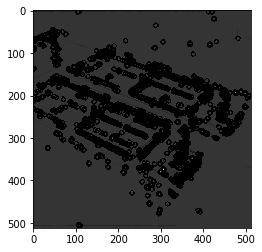

In [24]:
thresh = 55 # initial threshold
elapsed_cpu = cornerHarris_demo(thresh)

In [18]:
print("FPGA time = "+'{0:.10f}'.format(elapsed_fpga)+"\nCPU time  = "+'{0:.10f}'.format(elapsed_cpu))

FPGA time = 54.4409871101
CPU time  = 0.0094206333


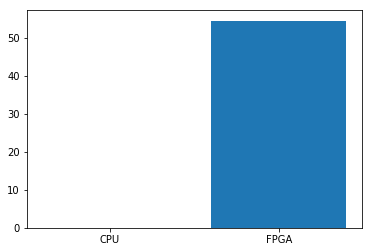

In [19]:
height = [elapsed_cpu, elapsed_fpga]
bars = ('CPU', 'FPGA')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()